
# 📃Table of Contents
1. [Linear Regression](#1)
2. [Importing the Libraries](#2)
3. [Label Encoding and OneHot Encoding](#3)
4. [Implementing Linear Regression](#4)
5. [Regression Assumptions](#5)
   1. [Linear Relationship](#6)
   2. [Homoscedasticity](#7)
   3. [Normal Distribution of Residuals](#8)
   4. [Autocorrelation](#9)
   5. [Multicollinearity](#10)
6. [Second Model](#11)
7. [Third Model](#12)
8. [Next Steps](#13)

<a class="anchor" id="1"></a>
# Linear Regression 
Linear Regression is the supervised Machine Learning model in which the model finds the **best fit linear line** between the independent and dependent variable i.e it finds the linear relationship between __the dependent and independent variable.__ 

The dataset is [Youtube Channel and Influencer Analysis](https://www.kaggle.com/datasets/kathir1k/youtube-influencers-data) which has observations related to the videos uploaded to the YouTube. I have preprocessed the dataset in this [notebook](https://www.kaggle.com/code/ramatadi/eda-on-youtube-channels) and made a cleaner dataset and using that dataset in this model.


Let us hypothesize that we can predict the number of views a video has got by assuming a linear relation between this target variable of `video_views` and other columns in the dataset as explanatory variables. As there are more than one independent variables in this dataset, we will be doing multiple linear regression.

<a class="anchor" id="2"></a>
##  Importing the libraries

In [530]:
#import the libraries 
import pandas as pd # Data Wrangling 
import numpy as np 
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization 
%matplotlib inline 
import datetime as dt

from statsmodels.graphics.gofplots import qqplot # Statiscal Models
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression # Model Fitting 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Model Evaluation 

In [483]:
# Display all columns
pd.options.display.max_columns = None

In [531]:
#Import the data 
youtube = pd.read_csv('../input/youtube-cleaned/youtube_cleaned.csv')

In [485]:
youtube.head(3)

,video_link,video_views,video_title,channel_url,creator_name,creator_gender,total_channel_subcribers,total_channel_views,duration_of_video,duration_in_seconds,date_of_video_upload,no_of_likes,language_of_the_video,subtitle,video_description,hashtags,no_of_comments,date_of_the_last_comment,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,community_engagement_(posts_per_week),intern_who_collected_the_data,duration_in_minutes,upload_year,upload_month,upload_weekday,length_category
0,https://www.youtube.com/watch?v=_0fUOJ55gis,146059,Samse - Didupe Off-road Royal Enfield Himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,1841,2022-07-29,6700,Kannada,no,Yes,0,419,2022-07-29,1080p,462,12,No,1,Akhil Teja,31,2022,July,Friday,Long
1,https://www.youtube.com/watch?v=_70MSLPRfZI,231969,Bhoom Baddhal Web Series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864,2022-05-22,7800,Telugu,no,Yes,1,189,2022-05-22,1080p,251,12,Yes,2,Akhil Teja,14,2022,May,Sunday,Medium
2,https://www.youtube.com/watch?v=_8gfCdt3H00&t=87s,878,"Customer Psychology, Four Views Of Consumer De...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,00:08:12,492,2021-02-09,858,Hindi,no,Yes,0,0,2021-02-09,720p,158,0,No,0,Syed safdar,8,2021,February,Tuesday,Short


In [486]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   video_link                             873 non-null    object
 1   video_views                            873 non-null    int64 
 2   video_title                            873 non-null    object
 3   channel_url                            873 non-null    object
 4   creator_name                           873 non-null    object
 5   creator_gender                         873 non-null    object
 6   total_channel_subcribers               873 non-null    int64 
 7   total_channel_views                    873 non-null    int64 
 8   duration_of_video                      873 non-null    object
 9   duration_in_seconds                    873 non-null    int64 
 10  date_of_video_upload                   873 non-null    object
 11  no_of_likes        

In [487]:
#converting the datetime values to ordinal values for the linear regression to parse. 
youtube['date_of_video_upload'] = pd.to_datetime(youtube['date_of_video_upload'])
youtube['date_of_video_upload'] = youtube['date_of_video_upload'].map(dt.datetime.toordinal)
youtube['date_of_the_last_comment'] = pd.to_datetime(youtube['date_of_the_last_comment'])
youtube['date_of_the_last_comment'] = youtube['date_of_the_last_comment'].map(dt.datetime.toordinal)

In [488]:
youtube.columns

Index(['video_link', 'video_views', 'video_title', 'channel_url',
       'creator_name', 'creator_gender', 'total_channel_subcribers',
       'total_channel_views', 'duration_of_video', 'duration_in_seconds',
       'date_of_video_upload', 'no_of_likes', 'language_of_the_video',
       'subtitle', 'video_description', 'hashtags', 'no_of_comments',
       'date_of_the_last_comment', 'maximum_quality_of_the_video',
       'no_of_videos_the_channel', 'no_of_playlist', 'premiered_or_not',
       'community_engagement_(posts_per_week)',
       'intern_who_collected_the_data', 'duration_in_minutes', 'upload_year',
       'upload_month', 'upload_weekday', 'length_category'],
      dtype='object')

Linear regression will not work on textual data. So dropping the columns that have textual data which can't be converted to numerical data. 

In [489]:
youtube.drop(['video_link', 'video_title', 'channel_url',
       'creator_name','duration_of_video','intern_who_collected_the_data'], axis = 1, inplace = True)

In [490]:
youtube.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   creator_gender                873 non-null    object
 1   language_of_the_video         873 non-null    object
 2   subtitle                      873 non-null    object
 3   video_description             873 non-null    object
 4   maximum_quality_of_the_video  873 non-null    object
 5   premiered_or_not              873 non-null    object
 6   upload_month                  873 non-null    object
 7   upload_weekday                873 non-null    object
 8   length_category               873 non-null    object
dtypes: object(9)
memory usage: 61.5+ KB



<a class='anchor' id = '3'></a>
### Label Encoding and Onehot Encoding

I had categorized video less than 2 minute, 10 minutes, 30 minutes, 60 minutes and greater than 60 minutes as Supershort, Short, Medium,Long and SuperLong categories in `length_category` column. So these are ordinal categorical values. So applying the label encoding on them. `maximum_quality_of_the_video` is also a ordinal categorical variable.

In [491]:
label_quality = { '240p' : 1, '360p':2, '480p':3, '720p':4,'1080p':5, '1440p':6, '2160p':7}
youtube['maximum_quality_of_the_video'] = youtube['maximum_quality_of_the_video'].map(label_quality)

In [492]:
youtube.length_category.unique()

array(['Long', 'Medium', 'Short', 'Supershort', 'SuperLong'], dtype=object)

In [493]:
label_length = {'Supershort': 1 , 'Short':2 ,'Medium':3,'Long':4, 'SuperLong':5}
youtube.length_category = youtube.length_category.map(label_length)

In [494]:
# Apply the one-hot encoding on nominal categorical variables
youtube_lr = pd.get_dummies(youtube)


<a class='anchor' id = 4></a>
## Implementing Linear Regression

### Segregating variables: Independent and Dependent Variables

In [495]:
#Separate the columns into explanatory variables and target variable
features = youtube_lr.drop('video_views', axis = 1)
target  = youtube_lr.video_views

In [496]:
features.shape,target.shape

((873, 64), (873,))

In [497]:
# Create  an instance of Linear Regression 
lr = LinearRegression()

In [498]:
# Fit the model.
lr.fit(features,target)

LinearRegression()

In [499]:
predictions = lr.predict(features)

In [500]:
residuals = target - predictions

In [501]:
mse = mean_squared_error(predictions,target)
rsquared = r2_score(target, predictions)
mae = mean_absolute_error(target, predictions)

In [502]:
print(' The mean absolute error of the model is:', mae, '\n',
    'The meansquared error of this model is :', mse ,'\n',
       'The R squared value of this model is :', rsquared,'\n')

 The mean absolute error of the model is: 72641439.68306996 
 The meansquared error of this model is : 4.899503566052241e+16 
 The R squared value of this model is : 0.7040098463368339 



<a class="anchor" id="5"></a>
# Regression Assumptions 

We make a few assumptions when we use linear regression to model the relationship between indepedent and dependent variables. These assumptions are essentially conditions that should be met before we draw inferences regarding the model estimates or before we use a model to make a prediction.

The important assumptions are:
1. Linear relationship between independent and dependent variables.
2. Homoscedasticity.
3. The Residuals are normally distributed.
4. No Autocorrelation among residuals. 
5. No Multicollinearity between the independent variables. 

<a class="anchor" id="6"></a>
## Linear Relationship

<AxesSubplot:xlabel='community_engagement_(posts_per_week)', ylabel='video_views'>

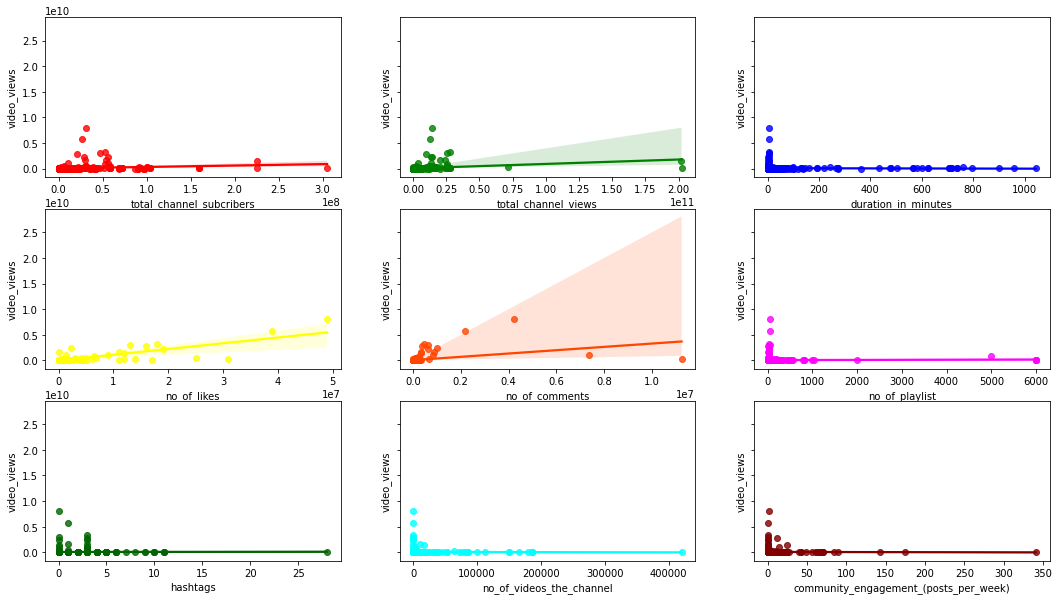

In [503]:

fig,ax = plt.subplots(3,3, sharey= True, figsize=(18, 10))
sns.regplot(x = 'total_channel_subcribers', y =  'video_views' , data = youtube, ax = ax[0,0], color = 'red')
sns.regplot(x = 'total_channel_views', y =  'video_views' , data = youtube, ax = ax[0,1],color = 'green')
sns.regplot(x = 'duration_in_minutes', y =  'video_views' , data = youtube, ax = ax[0,2], color = 'blue')
sns.regplot(x = 'no_of_likes', y =  'video_views' , data = youtube, ax = ax[1,0], color = 'yellow')
sns.regplot(x = 'no_of_comments', y =  'video_views' , data = youtube, ax = ax[1,1], color = 'orangered')
sns.regplot(x = 'no_of_playlist', y =  'video_views' , data = youtube, ax = ax[1,2], color = 'magenta')
sns.regplot(x = 'hashtags', y = 'video_views', data = youtube, ax = ax[2,0],color = 'darkgreen' )
sns.regplot(x = 'no_of_videos_the_channel', y = 'video_views', data = youtube, ax = ax[2,1], color = 'aqua')
sns.regplot(x = 'community_engagement_(posts_per_week)', y = 'video_views',data = youtube, ax = ax[2,2], color = 'maroon')

The graphs are telling that there is no linear relationship between many of the feature variables and the target variable. But we can observe the linear relationship in graphs where the scale of the variable is in the range of the scale of target variable. That means we need to transform the columns to a suitable scale either by standardization, normalization or by applying suitable logarithms on the values. 

<a class="anchor" id="7"></a>
### Homoscedasticity
 Let's plot a residual curve and check whether there is constant Variance in the residuals.

(-500000000.0, 1000000000.0)

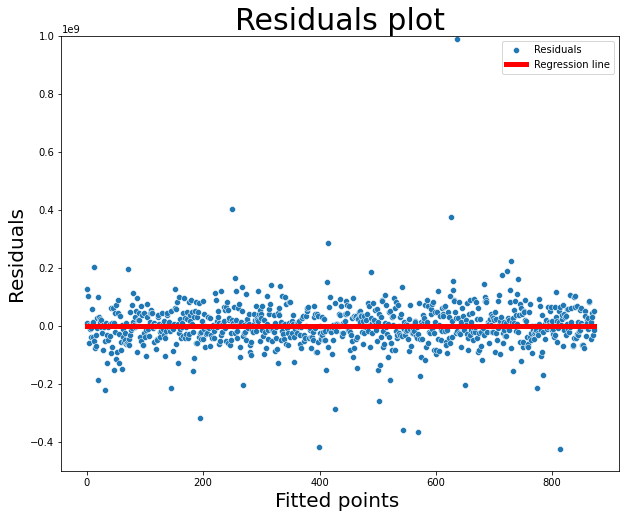

In [504]:
plt.figure(figsize = (10,8))
k = [0 for i in range(0,len(youtube))]
sns.scatterplot(x = youtube_lr.index, y = residuals, label = 'Residuals')
sns.lineplot(x = youtube_lr.index, y = k, color = 'red', linewidth = 5, label = 'Regression line')
plt.xlabel('Fitted points ', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Residuals plot', fontsize = 30)
plt.ylim(-500000000,1000000000)

We can observe that barring some outliers almost all the have the residuals are having same variance. So Homoskedasticity is present. 

<a class="anchor" id="8"></a>
### Normal Distribution of Residuals

<Figure size 1080x720 with 0 Axes>

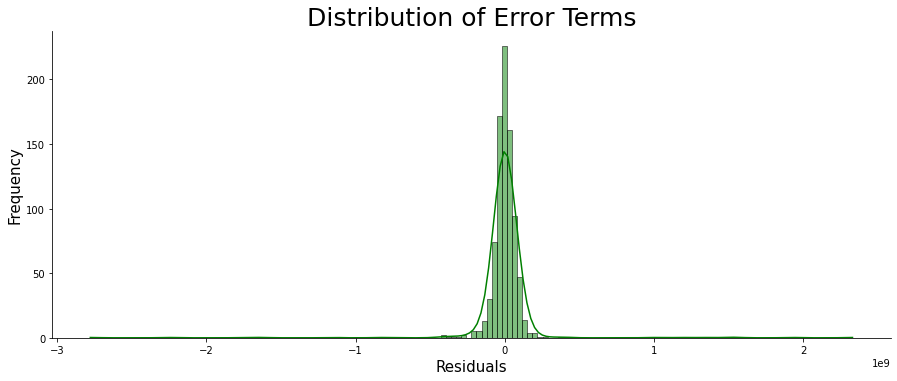

In [505]:
plt.figure(figsize = (15,10))
sns.displot(residuals,bins = 150, kde = True, height = 5, aspect = 2.5, color = 'green')
plt.xlabel('Residuals', fontsize  = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Error Terms', fontsize = 25)
plt.show()

Looking at the histogram of the residuals we can see that they are normally distributed with outliers skweing the distributin on  both sides. 

In [506]:
from statsmodels.graphics.gofplots import qqplot

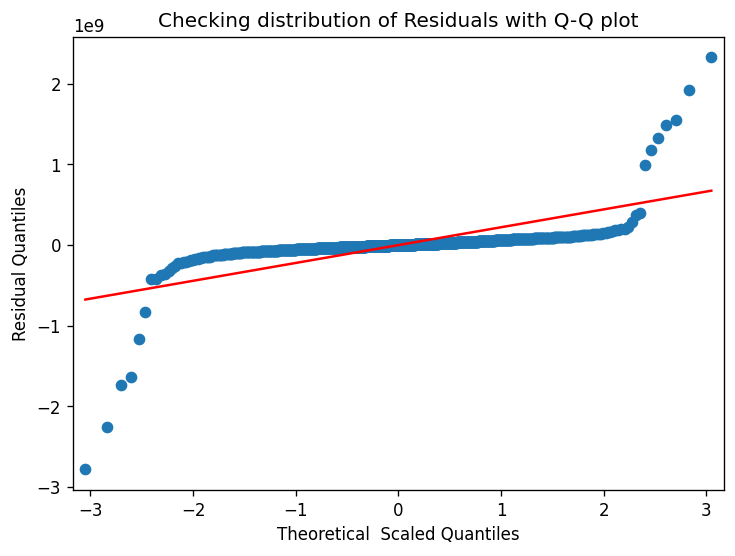

In [532]:
fig, ax = plt.subplots(figsize=(7,5) , dpi = 120)
qqplot(residuals, line = 's' , ax = ax,) # 's' - standardized line,
plt.ylabel('Residual Quantiles')
plt.xlabel('Theoretical  Scaled Quantiles')
plt.title('Checking distribution of Residuals with Q-Q plot')
plt.show()

The Q-Q plot shows that the data is normally distributed if not for the extreme largest values and the extreme smallest values.

<a class="anchor" id="9"></a>
## Autocorrelation

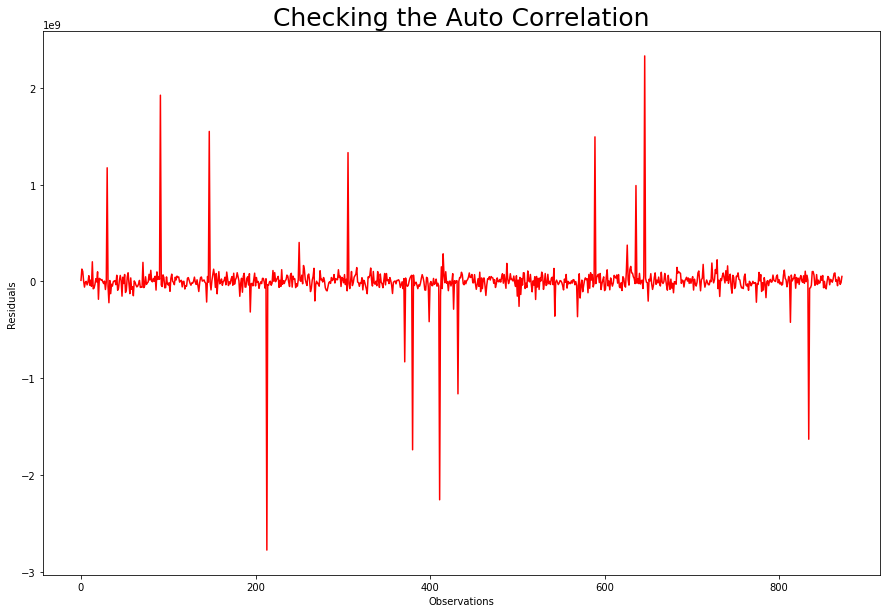

In [533]:
plt.figure(figsize = (15,10))
sns.lineplot(x = range(len(features)),y = residuals, color = 'red')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Checking the Auto Correlation', fontsize = 25)
plt.show()


In [509]:
print('The Durbin -Watson statistic is:', durbin_watson(residuals))

The Durbin -Watson statistic is: 1.9961954254212464


We can not observe any pattern between the residuals in the graph and they are randomly occuring without depending on the previous residuals. So Autocorrelation is not observed in the residuals. The Durbin Watson statistic is 1.996. So, we can confirm mathematically, that there is no Autocorrelation between the residual terms.

<a class="anchor" id="10"></a>
## Multicollienarity

A **variance inflation factor(VIF)** detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

 **VIF=1/(1−$R^{2}$)** 

 

Where R Squared is coefficient of determination,

In [534]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(youtube_lr.values, i) for i in range(youtube_lr.shape[1])], index =youtube_lr.columns)


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [511]:
pd.options.display.max_rows = 75

In [512]:
VIF[VIF.sort_values() > 10].sort_values()[:20]

upload_year                       1.405213e+04
duration_in_seconds               1.668175e+05
duration_in_minutes               1.668363e+05
upload_month_January              2.581673e+11
upload_month_April                2.746935e+11
language_of_the_video_Hindi       7.102909e+11
creator_gender_Male               1.045040e+12
language_of_the_video_English     1.523803e+12
premiered_or_not_No               2.089353e+12
premiered_or_not_Yes              2.484059e+12
creator_gender_Female             3.623169e+12
upload_weekday_Tuesday            5.323404e+12
upload_month_November             7.036874e+12
creator_gender_Company            1.366798e+13
upload_weekday_Wednesday          1.979604e+13
subtitle_no                       2.408342e+13
subtitle_yes                      2.460983e+13
language_of_the_video_Sanskrit    1.732154e+14
language_of_the_video_Kannada              inf
upload_month_February                      inf
dtype: float64

Text(0.5, 1.0, 'Variance Inflation Factor of the Independent Variables')

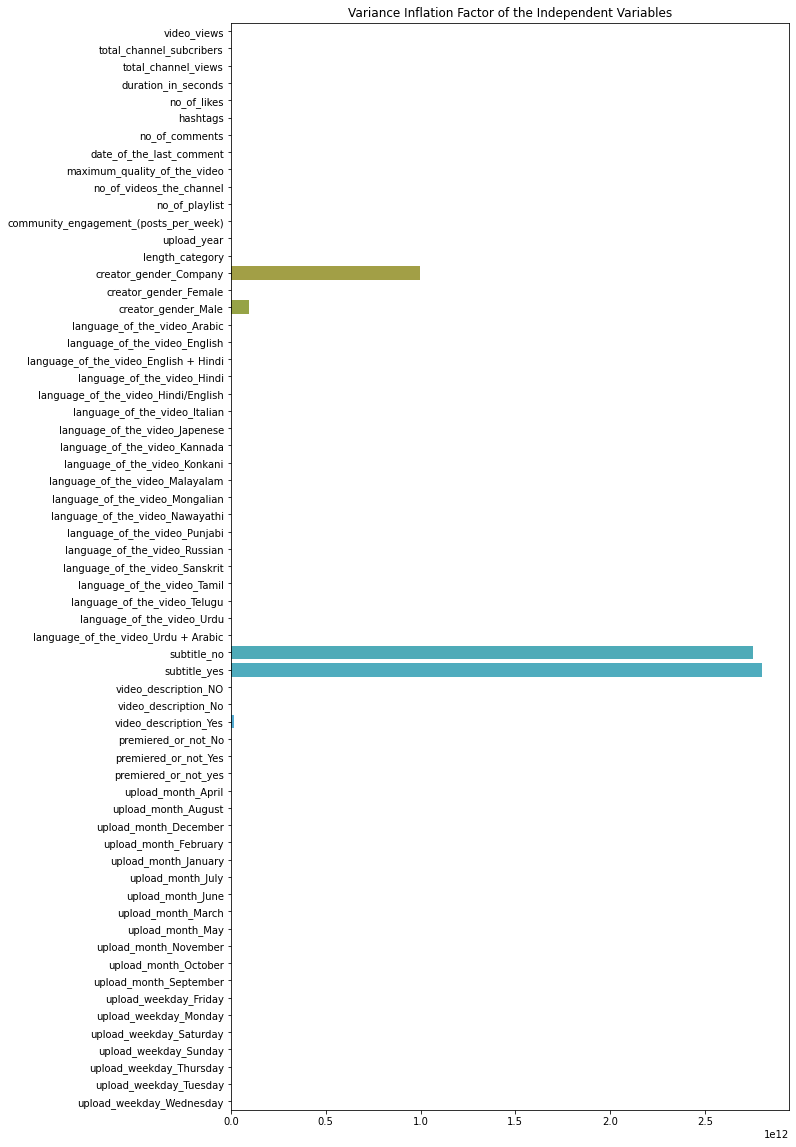

In [537]:
plt.figure(figsize = (10,20))
sns.barplot(y = VIF.index, x = VIF)
plt.title('Variance Inflation Factor of the Independent Variables')

From this list, we can clearly see that there happens to be many  Independent Variables with VIF values above 10 , which means that there are features that exhibit the Multicollinearity in the dataset. Most variables  showing VIF of above magnitude 10^5 are categorical variables which are onehot encoded. That means the model is prone to **dummy variable trap.**  

Text(0.5, 1.0, 'Correlation Heat Map')

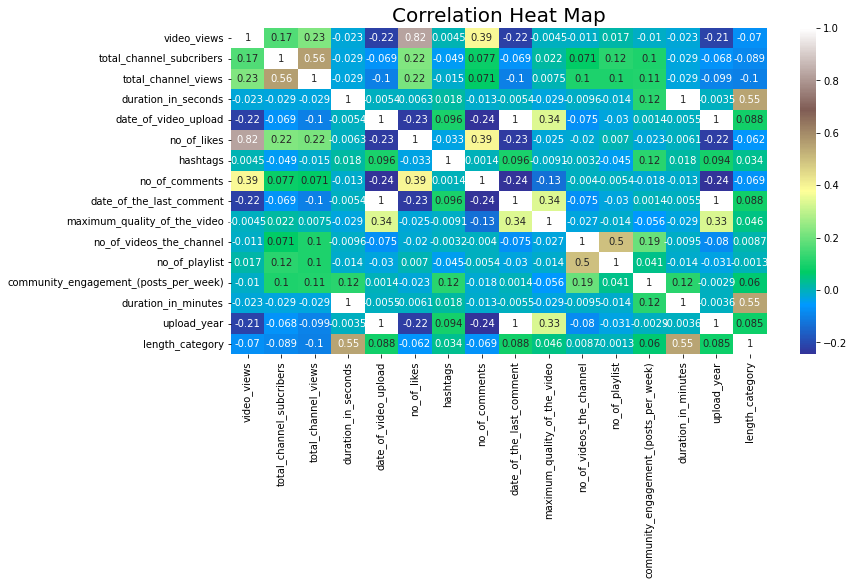

In [514]:
plt.figure(figsize = (12,6))
sns.heatmap(youtube.corr(),annot = True, cmap = 'terrain')
plt.title('Correlation Heat Map', fontsize = 20)

The correlation heatmap shows that there are columns with perfect multicollinearity with correlation value 1. That means there is no use with these variables in the model. So we will drop the variables `duration_in-minutes` and `date_of_video_upload` from the model.

<a class="anchor" id="11"></a>
## Second Model

In [515]:
youtube_lr = youtube_lr.drop(['duration_in_minutes','date_of_video_upload'], axis = 1 )

In [516]:
features = youtube_lr.drop('video_views', axis = 1)
target  = youtube_lr.video_views

In [517]:
#Creating second Linear Regression instance. 
lr2 = LinearRegression()
lr2.fit(features,target)
predictions2 = lr2.predict(features)

In [518]:
mse2 = mean_squared_error(predictions2,target)
rsquared2  = r2_score(target, predictions2)
mae2 = mean_absolute_error(target, predictions2)

In [519]:
print(' The mean absolute error of  2nd model is:', mae2, '\n',
    'The meansquared error of 2nd model is :', mse2 ,'\n',
       'The R squared value of 2nd model is :', rsquared2,'\n')

 The mean absolute error of  2nd model is: 72583949.80150197 
 The meansquared error of 2nd model is : 4.90055230751057e+16 
 The R squared value of 2nd model is : 0.70394648948012 




<a class = 'anchor' id = 12></a>
## Third Model

Lets us now drop all the columns which got VIF values greater than 10.

In [520]:
youtube_lr3 = youtube_lr.drop(['upload_year', 'duration_in_seconds',
       'upload_month_January', 'upload_month_April',
       'language_of_the_video_Hindi', 'creator_gender_Male',
       'language_of_the_video_English', 'premiered_or_not_No',
       'premiered_or_not_Yes', 'creator_gender_Female',
       'upload_weekday_Tuesday', 'upload_month_November',
       'creator_gender_Company', 'upload_weekday_Wednesday', 'subtitle_no',
       'subtitle_yes', 'language_of_the_video_Sanskrit'], axis = 1)

In [521]:
features = youtube_lr3.drop(['video_views'], axis = 1)
target = youtube_lr3['video_views']

In [522]:
#Create third instance of Linear Regression
lr3 = LinearRegression()
lr3.fit(features, target)
predictions = lr3.predict(features)

In [523]:
mse3 = mean_squared_error(predictions2,target)
rsquared3  = r2_score(target, predictions2)
mae3 = mean_absolute_error(target, predictions2)

In [524]:
print(' The mean absolute error of  3rd model is:', mae3, '\n',
    'The meansquared error of 3rd model is :', mse3 ,'\n',
       'The R squared value of 3rd model is :', rsquared3,'\n')

 The mean absolute error of  3rd model is: 72583949.80150197 
 The meansquared error of 3rd model is : 4.90055230751057e+16 
 The R squared value of 3rd model is : 0.70394648948012 



In [528]:
target.describe()

count    8.730000e+02
mean     5.522344e+07
std      4.070861e+08
min      2.300000e+01
25%      1.943890e+05
50%      1.250286e+06
75%      9.002909e+06
max      7.990990e+09
Name: video_views, dtype: float64

<a id = '13'></a>
## Next Steps

We could not find any considerable improvement in the model even after dropping the columns causing Multicollinearity and dummy variable trap. Its mostly because of the scale differeneces between the columns that is causing the huge error. Some columns are in tens, some columns values are in 10^9 etc. The target column itself  has huge scale difference running from 10^1 to 10^09. These huge differences in scale will render the regression to become heavily biased by extreme values. So we have to transform the columns by implementing  methods like scaling, normalization, log transformations etc and build new models. We can also build models spliting the dataset into training and test datasets. 

# Please give your feedback and helpful suggestions to improve my learning and skills. Thank you. 🙏🏻🙏🏻🙏🏻